In [1]:
import collections

import importlib
import glob
import os
import os.path
os.chdir('/home/olivier/dev/bullinger')

import matplotlib
from matplotlib.lines import Line2D
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from bullinger import annotations, visualizer
annotations = importlib.reload(annotations)
visualizer = importlib.reload(visualizer)

In [2]:
filenames = glob.glob('resources/data/**/*.txt')
videos = collections.defaultdict(list)
for filename in filenames:
    baby = os.path.basename(os.path.dirname(filename))
    videos[baby].append(filename)
    
print('\n'.join(map(lambda kv: "{}: ({})".format(kv[0], len(kv[1])), videos.items())))

Francesco: (4)
Lorenzo: (2)
AndreaT II: (2)
Ester: (2)
Francesca: (4)
Andrea I: (2)
Claudio: (2)
Chiara: (2)
Giullia: (4)
Arianna: (2)
Isabella: (4)
Duccio: (2)
Martina: (4)
Flavio: (2)
Jacopo: (2)
Carlo: (2)


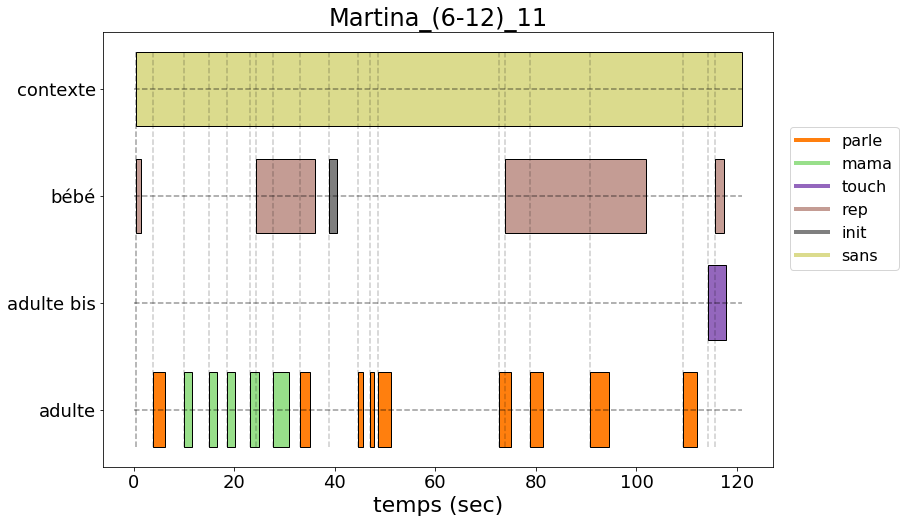

In [3]:
va = annotations.VideoAnnotations(videos['Martina'][2])
viewer = visualizer.AnnotationsVisualizer(va, actor_height=0.7)
viewer.chronogram()

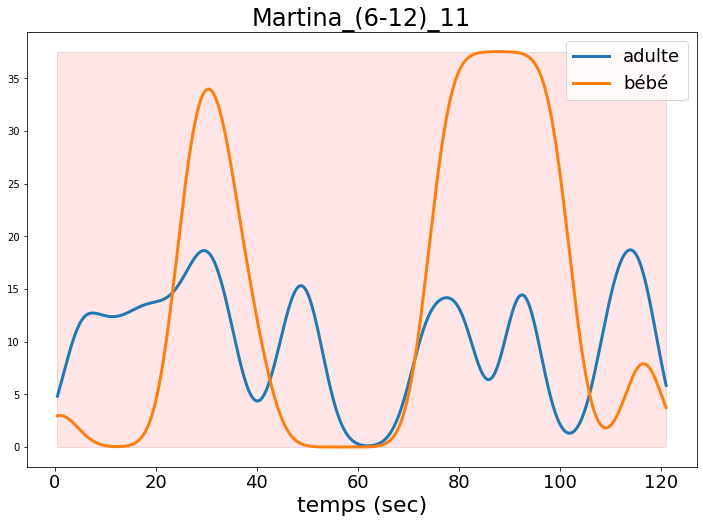

In [13]:
viewer.activity(num_points=500, relative_sigma=0.03)

In [5]:
df_ad = va.df[(va.df.actor == 'adulte') | (va.df.actor == 'adulte bis')]
df_ad.groupby('tag').agg({'duration': 'sum'}).apply(lambda x: x / float(x.sum())).sort_values('duration')

,duration
tag,
touch,0.103556
mama,0.284728
parle,0.611715


In [6]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

def sines(num_points=100):
    t = np.linspace(0, 2 * np.pi, num_points)
    x = np.stack([t, np.sin(5 * t)], axis=1)
    y = np.stack([t, np.sin(8 * t + 2)], axis=1)
    return x, y

def register(va, num_points=100, relative_sigma=0.03):
    x = va.to_activity('adulte,adulte bis', num_points, relative_sigma)
    y = va.to_activity('bébé', num_points, relative_sigma)
    
    distance, path = fastdtw(x, y, dist=euclidean)
    path = np.array(path)
    a = x[path[:,0]]
    b = y[path[:,1]]
    return x, y, a, b, distance, path


def plot_registration(x, y, a, b):
    fig, axes = plt.subplots(2, 1, figsize=(20, 12))

    ax = axes[0]
    ax.set_title('original', fontsize=18)
    ax.plot(x[:,0], x[:,1], lw=3, label='adulte')
    ax.plot(y[:,0], y[:,1], lw=3, label='bebe')
    ax.legend(fontsize=15)

    ax = axes[1]
    ax.set_title('unwrapped', fontsize=18)
    ax.plot(a[:,1], lw=3, label='adulte')
    ax.plot(b[:,1], lw=3, label='bebe')
    ax.legend(fontsize=15)

10411.541452488033

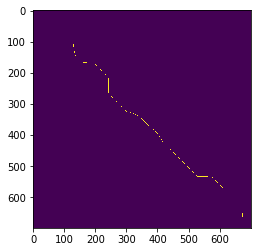

In [14]:
num_points = 700
x, y, a, b, distance, path = register(va, num_points=num_points, relative_sigma=0.03)
m = np.zeros((num_points, num_points))
m[path[:,0], path[:,1]] = 1
plt.imshow(m)
distance

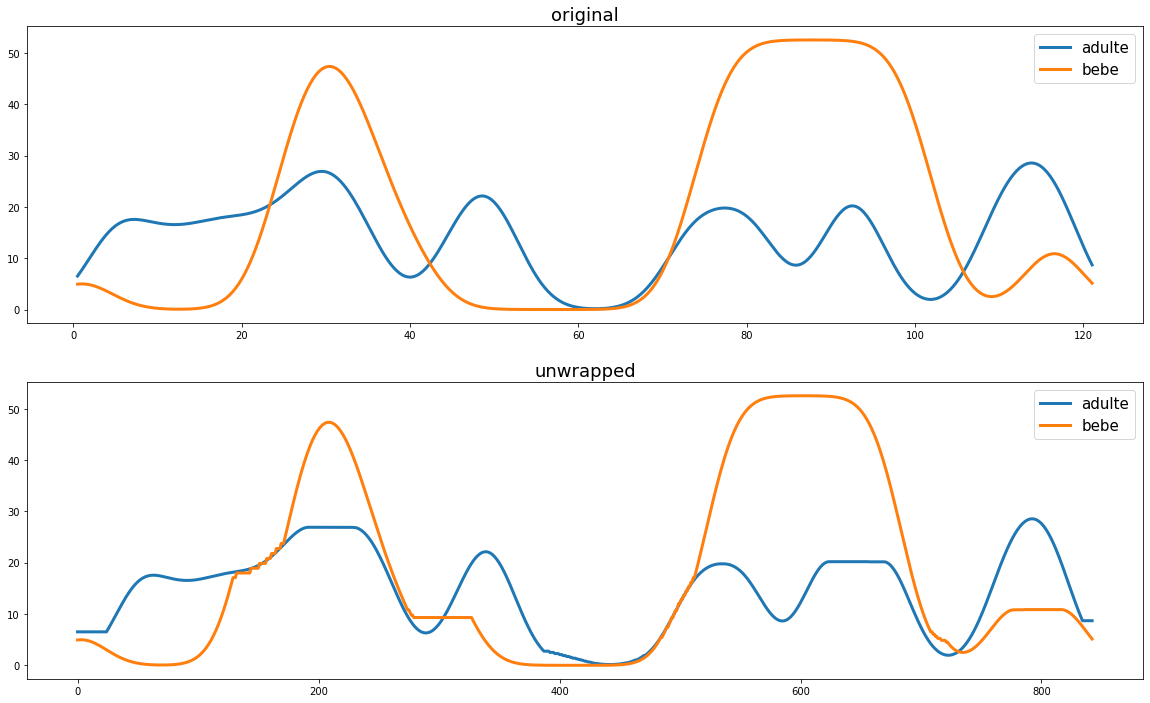

In [15]:
plot_registration(x, y, a, b)